In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



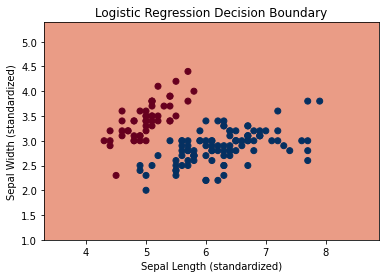

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = (iris.target != 0) * 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [7]:
df = pd.read_csv('data.csv').dropna()

42 42


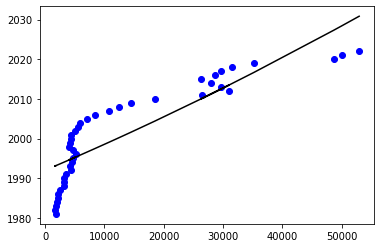

In [45]:
X = df.iloc[:,1]
Y = df.iloc[:,0]
n = len(X)
sX = np.sum(X)
sX2 = np.sum(np.square(X))
sX3 = np.sum(X**3)
sX4 = np.sum(X**4)
mat = [[n,sX,sX2], [sX,sX2,sX3], [sX2,sX3,sX4]]
y = [np.sum(Y), np.sum(np.multiply(X,Y)), np.sum(np.multiply(X**2,Y))]
a = np.linalg.solve(mat,y)
yhat = lambda x: a[0] + a[1]*x + a[2]*(x**2)
plt.plot(X,yhat(X), color='k')
print(len(X), len(Y))
plt.scatter(X, Y, color='b')

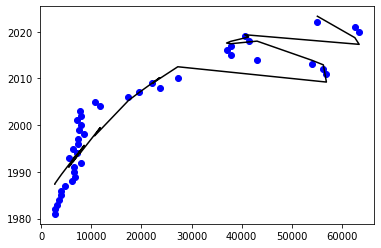

In [30]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
pred = model.predict(poly.transform(X))
plt.plot(X.iloc[:,1],pred, color='k')
plt.scatter(X.iloc[:,1], Y, color='b')

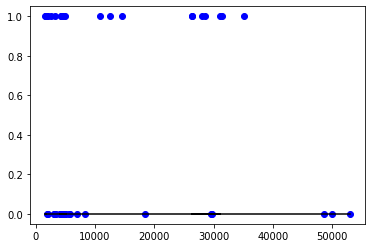

In [62]:
lab = np.random.randint(2, size=len(Y))
X = np.array(df.iloc[:,1])
X = X.reshape(-1,1)
model = LogisticRegression(random_state=0).fit(X, lab)
pred = model.predict(X)
plt.plot(X,pred, color='k')
plt.scatter(X, lab, color='b')

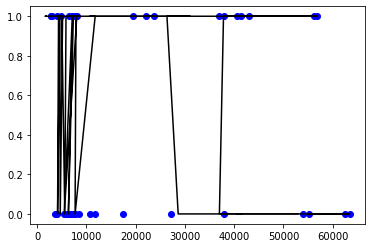

In [72]:
X = np.array(df.iloc[:,1:])
model = LogisticRegression(random_state=0).fit(X, lab)
pred = model.predict(X)
plt.plot(X,pred, color='k')
plt.scatter(X[:,1], lab, color='b')